This is the dataset for our text to speech conversion task, taken from Vietnamese ebooks and audiobooks on the internet. This dataset is for research purposes only.

This dataset includes the following features:

- Audio url: Link of the audiobook
- Text url: Link of the text book
- Title: Name of the book
- Author: Name of the book's author
- Duration: Total audiobook duration
- Narrator: Name of the narrator
- Duration hours: Total audiobook duration in hours


In [27]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# 1. Read dataset


In [28]:
def read_dataset(path):
  df = pd.read_csv(path)
  display(df.head())
  display(df.shape)
  display(df.describe())
  return df


PATH = "../data/metadata/metadata_book.csv"
df = read_dataset(PATH)

,audio_url,text_url,title,author,duration,narrator,duration_hour
0,https://sachnoiviet.net/sach-noi/chut-phan-lin...,https://thuviensachpdf.com/chut-phan-linh-dinh,Chút Phận Linh Đinh,Hồ Biểu Chánh,4:34:22,Quốc Thịnh,4.5728
1,https://sachnoiviet.net/sach-noi/ivanhoe,https://thuviensachpdf.com/ivanhoe,Ivanhoe,Sir Walter Scott,20:01:24,Ngô Hồng,20.0233
2,https://sachnoiviet.net/sach-noi/ai-vao-dia-nguc,https://thuviensachpdf.com/ai-vao-dia-nguc,Ai Vào Địa Ngục?,Nguyên Minh,3:06:21,Thanh Cúc,3.1058
3,https://sachnoiviet.net/sach-noi/hang-dong-cua...,https://thuviensachpdf.com/hang-dong-cua-cac-l...,Hang Động Của Các Lạt Ma,Lobsang Rampa,9:58:22,Hướng Dương,9.9728
4,https://sachnoiviet.net/sach-noi/loan-mat-nhung,https://thuviensachpdf.com/loan-mat-nhung,Loan Mắt Nhung,Nguyễn Thụy Long,18:02:33,Hồng Nhung,18.0425


(1334, 7)

,duration_hour
count,1328.000000
mean,9.207446
std,16.537300
min,0.379200
25%,3.951475
50%,6.220850
75%,9.772550
max,427.459700


# 2. Data Analysis


In [29]:
# Data analysis
df.isnull().sum()

audio_url        0
text_url         0
title            0
author           0
duration         1
narrator         0
duration_hour    6
dtype: int64

In [30]:
df.loc[df["duration_hour"].isnull()]

,audio_url,text_url,title,author,duration,narrator,duration_hour
217,https://sachnoiviet.net/sach-noi/con-duong-may...,https://thuviensachpdf.com/con-duong-may-trang,Con Đường Mây Trắng,Osho,NaN,Giang Nguyễn,NaN
546,https://sachnoiviet.net/sach-noi/binh-minh-va-...,https://thuviensachpdf.com/binh-minh-va-hoang-hon,Bình Minh Và Hoàng Hôn,Tân Di Ổ,4:05;10,Unknown,NaN
716,https://sachnoiviet.net/sach-noi/cang-doc-lap-...,https://thuviensachpdf.com/cang-doc-lap-cang-c...,Càng Độc Lập Càng Cao Quý,Vãn Tình,8:14:52,Mộc,NaN
1046,https://sachnoiviet.net/sach-noi/con-se-lam-duoc,https://thuviensachpdf.com/con-se-lam-duoc,Con Sẽ Làm Được,Donna M. Genetit,2:01;40,Ái Hòa,NaN
1173,https://sachnoiviet.net/sach-noi/tinh-yeu-tro-lai,https://thuviensachpdf.com/tinh-yeu-tro-lai,Tình Yêu Trở Lại,Rachel Gibson,25:21:20:,Việt Hùng,NaN
1197,https://sachnoiviet.net/sach-noi/tren-sa-mac-v...,https://thuviensachpdf.com/tren-sa-mac-va-tron...,Trên Sa Mạc Và Trong Rừng Thẳm,Henryk Sienkiewicz,13;23;03,Trí An,NaN


In [31]:
df.loc[217, "duration"] = None  # Dang cap nhat -> NaN
df.loc[536, "duration"] = "4:05:10"  # 4:05;10
df.loc[716, "duration"] = "8:14:52"  # 8:14::52
df.loc[1046, "duration"] = "2:01:40"  # 2:01;40
df.loc[1173, "duration"] = "25:21:20"  # 25:21:20:
df.loc[1197, "duration"] = "13:23:03"  # 13;23;03

In [32]:
df.sort_values(by=["narrator", "duration_hour"], ascending=False, na_position="first")

,audio_url,text_url,title,author,duration,narrator,duration_hour
26,https://sachnoiviet.net/sach-noi/buoc-dau-hoc-...,https://thuviensachpdf.com/buoc-dau-hoc-phat,Bước Đầu Học Phật,Thích Thanh Từ,10:31:45,Đức Uy,10.5292
348,https://sachnoiviet.net/sach-noi/sen-no-troi-p...,https://thuviensachpdf.com/sen-no-troi-phuong-...,Sen Nở Trời Phương Ngoại,Thích Nhất Hạnh,9:04:56,Đức Uy,9.0822
127,https://sachnoiviet.net/sach-noi/thien-su-viet...,https://thuviensachpdf.com/thien-su-viet-nam,Thiền Sư Việt Nam,Thích Thanh Từ,8:44:54,Đức Uy,8.7483
581,https://sachnoiviet.net/sach-noi/neo-ve-cua-y,https://thuviensachpdf.com/neo-ve-cua-y,Nẻo Về Của Ý,Thích Nhất Hạnh,7:7:44,Đức Uy,7.1289
910,https://sachnoiviet.net/sach-noi/hanh-phuc-mon...,https://thuviensachpdf.com/hanh-phuc-mong-va-thuc,Hạnh Phúc Mộng Và Thực,Thích Nhất Hạnh,6:30:20,Đức Uy,6.5056
...,...,...,...,...,...,...,...
569,https://sachnoiviet.net/sach-noi/trai-dat-tron...,https://thuviensachpdf.com/trai-dat-tron-long-...,"Trái Đất Tròn, Lòng Người Góc Cạnh",Minh Mẫn,8:22:35,An Nhiên,8.3764
1330,https://sachnoiviet.net/sach-noi/truc-lam-day-...,https://thuviensachpdf.com/truc-lam-day-song,Trúc Lâm Dậy Sóng,Thích Hộ Giác,5:48:58,An Nhiên,5.8161
1228,https://sachnoiviet.net/sach-noi/viet-nam-mau-...,https://thuviensachpdf.com/viet-nam-mau-lua-qu...,Việt Nam Máu Lửa Quê Hương Tôi,Hoành Linh Đỗ Mậu,19:12:40,AlphaBê,19.2111
1180,https://sachnoiviet.net/sach-noi/ba-chi-em-nha...,https://thuviensachpdf.com/ba-chi-em-nha-ho-tong,Ba Chị Em Nhà Họ Tống,Nguyễn Vạn Lý,2:06:27,AlphaBê,2.1075


In [33]:
df_ = df.iloc[:, [5, 6]]
df_.groupby("narrator").sum().sort_values(by="duration_hour", ascending=False)

,duration_hour
narrator,
Unknown,925.2477
Lát Radio,427.4597
Lê Duyên,422.3822
Hoàng Vinh,415.6097
VOV Giao Thông,326.7058
...,...
Anh Chi,1.4425
SHI,0.5617
Lê Á Thi,0.5464


## Unknown narrator


In [34]:
unknown_narrator = df.loc[df.narrator == "Unknown"]
unknown_narrator

,audio_url,text_url,title,author,duration,narrator,duration_hour
37,https://sachnoiviet.net/sach-noi/nhung-tro-ngu...,https://thuviensachpdf.com/nhung-tro-nguy-bien...,Những Trò Ngụy Biện Biến Sai Thành Trái,Alpha Books,2:55:41,Unknown,2.9281
39,https://sachnoiviet.net/sach-noi/ban-chat-cua-...,https://thuviensachpdf.com/ban-chat-cua-doi-tra,Bản Chất Của Dối Trá,Dan Ariely,6:02:30,Unknown,6.0417
40,https://sachnoiviet.net/sach-noi/phi-ly-tri,https://thuviensachpdf.com/phi-ly-tri,Phi Lý Trí,Dan Ariely,5:10:24,Unknown,5.1733
44,https://sachnoiviet.net/sach-noi/thien-nga-den,https://thuviensachpdf.com/thien-nga-den,Thiên Nga Đen,Nassim Nicholas Taleb,15:02:30,Unknown,15.0417
48,https://sachnoiviet.net/sach-noi/tac-nhan-thu-hut,https://thuviensachpdf.com/tac-nhan-thu-hut,Tác Nhân Thu Hút,Joe Vitale,8:18:06,Unknown,8.3017
...,...,...,...,...,...,...,...
1267,https://sachnoiviet.net/sach-noi/vi-uoc-mo-nga...,https://thuviensachpdf.com/vi-uoc-mo-ngai-gi-d...,Vì Ước Mơ Ngại Gì Dốc Cạn Tâm Sức,Mễ Lạp,6:32:20,Unknown,6.5389
1276,https://sachnoiviet.net/sach-noi/lam-chu-nghic...,https://thuviensachpdf.com/lam-chu-nghich-canh,Làm Chủ Nghịch Cảnh,Bobby Bones,7:18:24,Unknown,7.3067
1291,https://sachnoiviet.net/sach-noi/quan-ly-thoi-...,https://thuviensachpdf.com/quan-ly-thoi-gian-t...,Quản Lý Thời Gian Thông Minh Của Người Thành Đạt,Duncan Banatyne,5:39:33,Unknown,5.6592
1312,https://sachnoiviet.net/sach-noi/canh-buom-do-...,https://thuviensachpdf.com/canh-buom-do-tham,Cánh Buồm Đỏ Thắm,Aleksandr Grin,3:30:24,Unknown,3.5067


In [35]:
unknown_narrator.describe()

,duration_hour
count,130.000000
mean,7.117290
std,3.884006
min,1.000000
25%,4.541800
50%,6.566800
75%,8.335550
max,20.331700


# 3. Visualization


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# set overall plot style, font size scaling factor and color palette
sns.set(style="darkgrid", font_scale=1.2, palette="pastel")

In [37]:
# add data label for horizontal bar charts
import matplotlib


def datalabel_hbar(ax, fontsize=12):
  rects = [
    rect for rect in ax.get_children() if isinstance(rect, matplotlib.patches.Rectangle)
  ]

  for rect in rects:
    width = rect.get_width()
    if width > 1:
      ax.annotate(
        f"{width:.0f}",
        xy=(width, rect.get_y() + rect.get_height() / 2),
        xytext=(5, -3),  # 5 points offset textcoords="offset points"
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=fontsize,
      )

In [38]:
def chart(data: pd.DataFrame(), x: str, y: str, xlabel: str, ylabel: str):
  fig, ax = plt.subplots(figsize=(10, 15))

  g = sns.barplot(
    x=x,
    y=y,
    data=data.sort_values(by=x, ascending=False).iloc[:50],
    color=sns.color_palette()[4],
    saturation=1.0,
  )
  # add data labels
  datalabel_hbar(g)

  # remove x-axis tick labels
  g.xaxis.set_ticklabels([])

  # rename axes labels
  g.set(xlabel=xlabel, ylabel=ylabel)
  # remove border
  sns.despine(bottom=True)

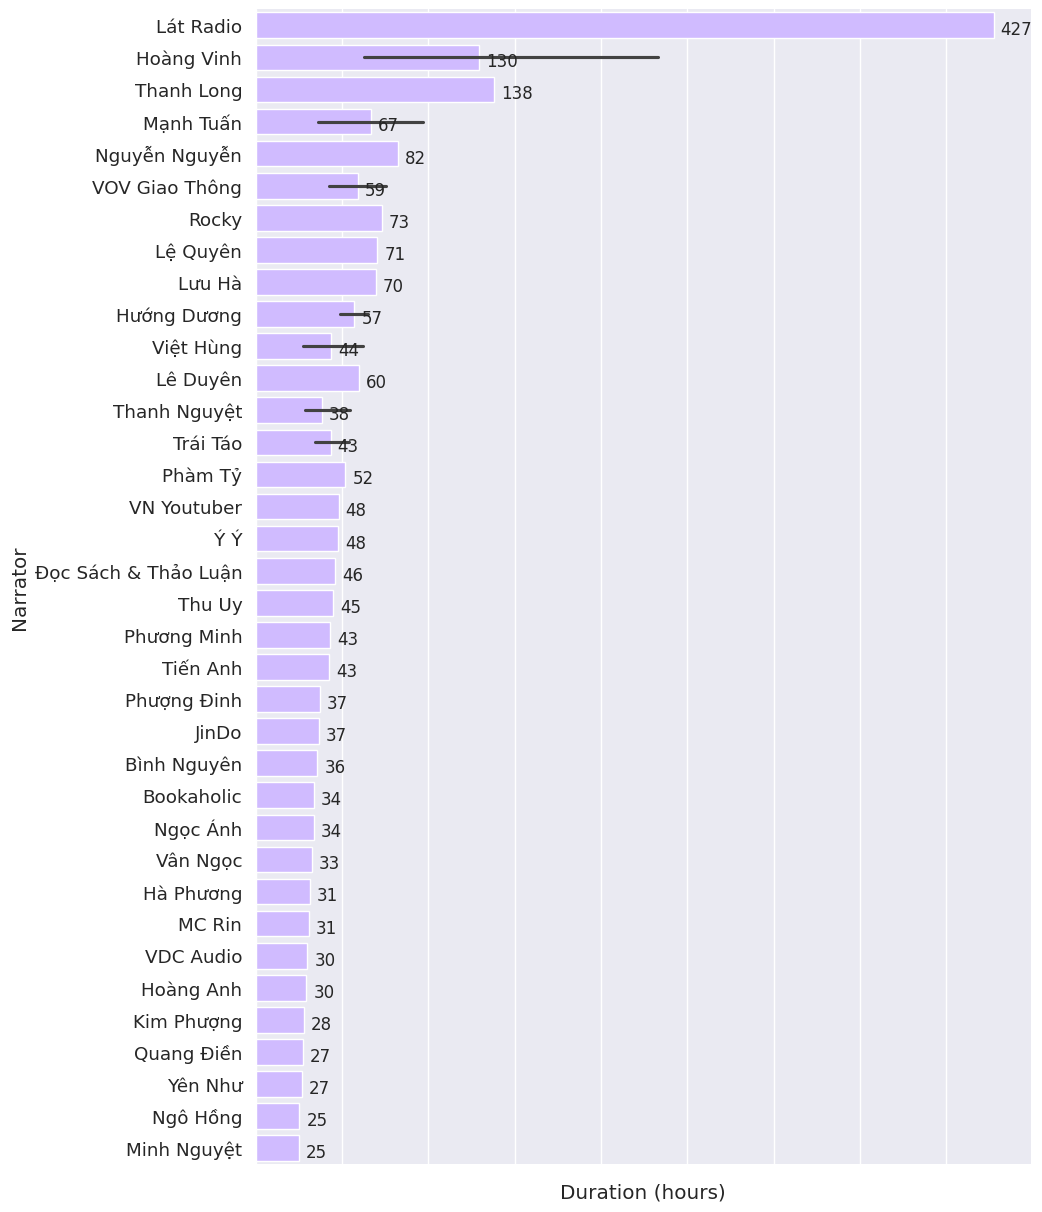

In [39]:
# Classifer narrators
chart(
  data=df, x="duration_hour", y="narrator", xlabel="Duration (hours)", ylabel="Narrator"
)

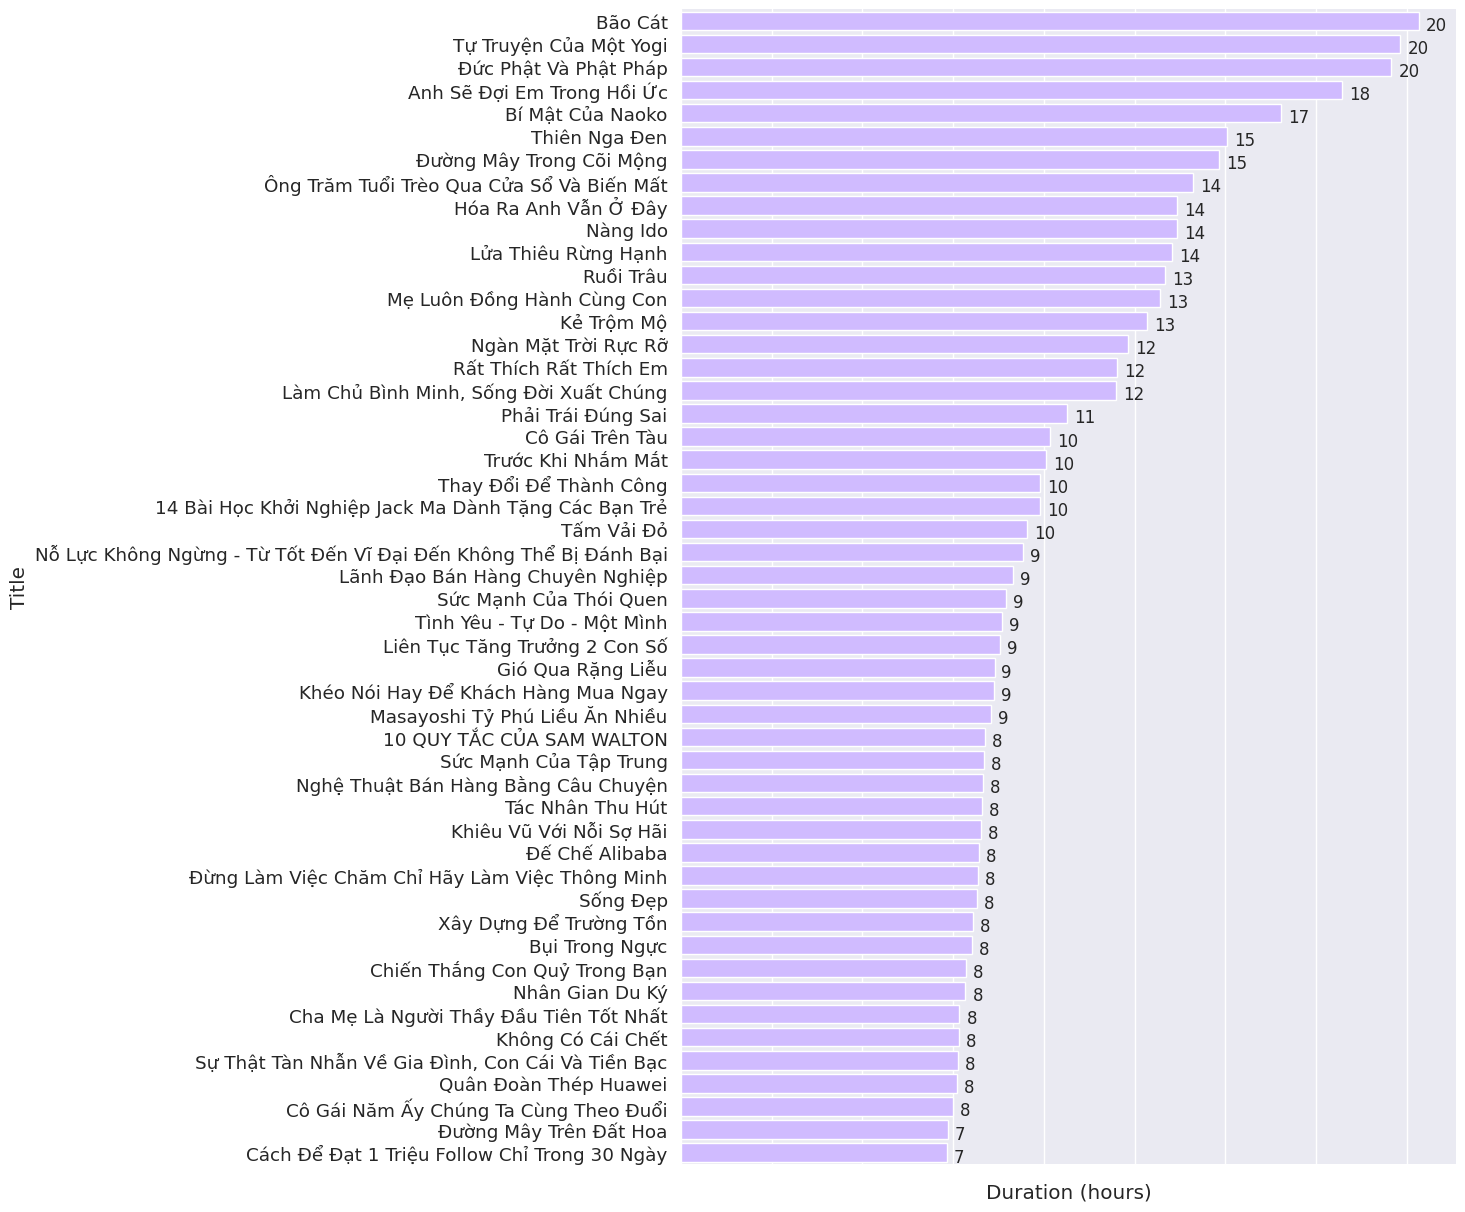

In [40]:
# Unknown narrators
chart(
  data=unknown_narrator,
  x="duration_hour",
  y="title",
  xlabel="Duration (hours)",
  ylabel="Title",
)